In [179]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [180]:
#Reding the data
Countrydata = pd.read_csv(r"E:\Country.csv",sep=",", encoding="ISO-8859-1", header=0)
Countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [181]:
Countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [182]:
Countrydata.shape

(167, 10)

In [183]:
#Checking for null values
Countrydata.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [184]:
#Getting the columns
Countrydata.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [185]:
y = Countrydata.pop("country")

In [186]:
Countrydata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


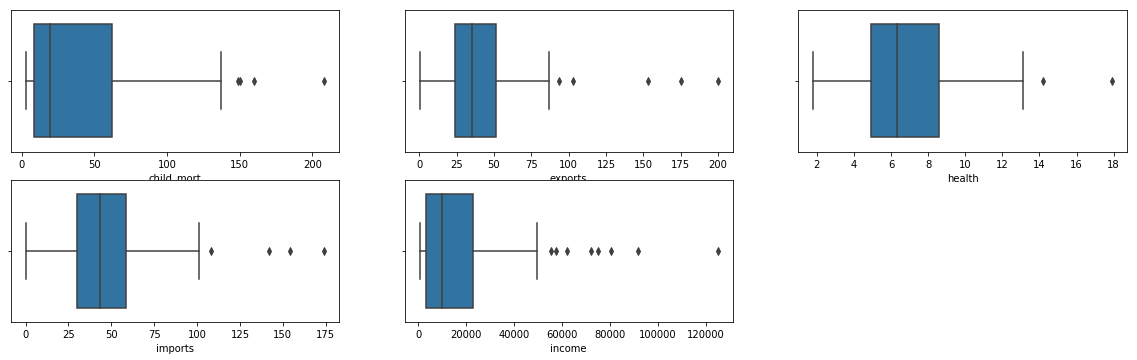

In [187]:
#Plotting the boxplot for outliers.

plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='child_mort',data = Countrydata )
plt.subplot(4,3,2)
sns.boxplot(x ='exports',data = Countrydata )
plt.subplot(4,3,3)
sns.boxplot(x ='health',data = Countrydata )
plt.subplot(4,3,4)
sns.boxplot(x ='imports',data = Countrydata )
plt.subplot(4,3,5)
sns.boxplot(x ='income',data = Countrydata )

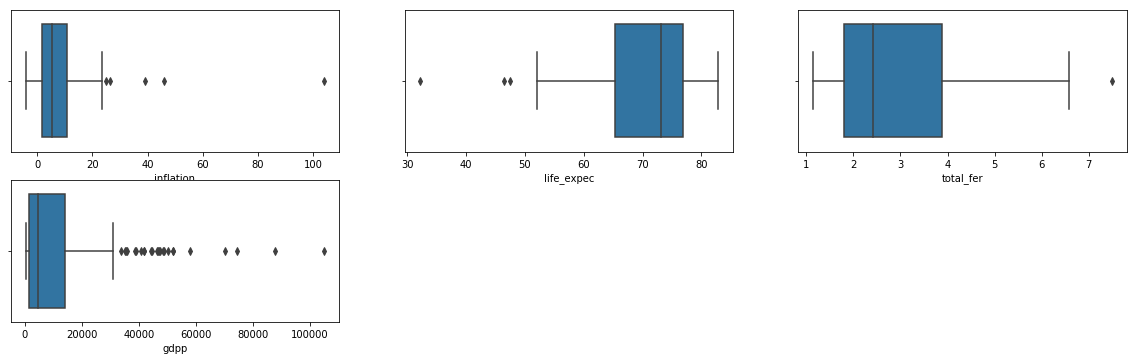

In [188]:
#Plotting the boxplot for outliers.

plt.figure(figsize = (20,12))
plt.subplot(4,3,1)
sns.boxplot(x ='inflation',data = Countrydata )
plt.subplot(4,3,2)
sns.boxplot(x ='life_expec',data = Countrydata )
plt.subplot(4,3,3)
sns.boxplot(x ='total_fer',data = Countrydata )
plt.subplot(4,3,4)
sns.boxplot(x ='gdpp',data = Countrydata )

In [189]:
#Adding ID column
Countrydata['ID'] = Countrydata.index+100

In [190]:
Countrydata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [191]:
#Saving ID data
Column_ID = Countrydata['ID']

In [192]:
#Dropping the ID column
Countrydata1 = Countrydata.drop('ID', axis =1)

In [193]:
Countrydata1.shape

(167, 9)

In [145]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Countrydata2 =scaler.fit_transform(Countrydata1)

C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Atul\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [146]:
Countrydata2.max()

9.129718055281284

In [147]:
Countrydata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [103]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(Countrydata2)
# Eigen Value Decomposition

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [104]:
#Getting the components of PCA
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [105]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

<BarContainer object of 9 artists>

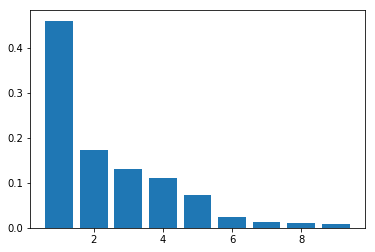

In [123]:
#Plotting the scree plot
%matplotlib inline
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [124]:
Var_cumulative = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Variance')

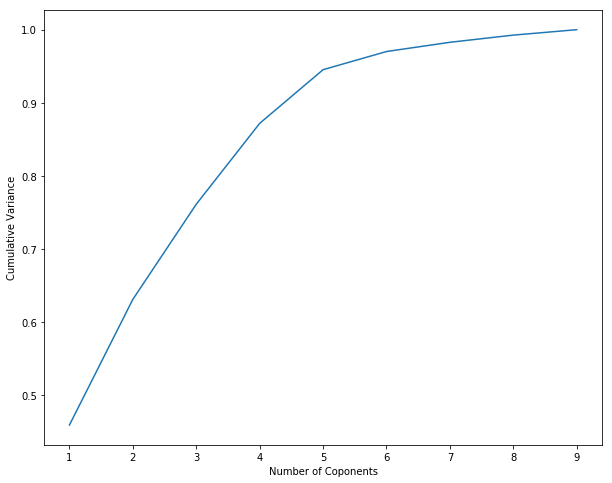

In [127]:
#Getting the scree plot
fig = plt.figure(figsize = (10,8))
plt.plot(range(1,len(Var_cumulative)+1),Var_cumulative)
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

In [148]:
pc1 = PCA(n_components=3, random_state=42)

In [150]:
# Transforming the data here
Countrydata3 = pc1.fit_transform(Countrydata2)

In [152]:
Countrydata3.shape

(167, 3)

In [153]:
# Creating the dataframe with the PCs obtained
pca_df = pd.DataFrame(Countrydata3, columns=["PC1", "PC2","PC3"])
pca_df.head()

,PC1,PC2,PC3
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721


In [155]:
#Concatenating countries with PCA
pca_df_final = pd.concat([pca_df, y], axis=1)

In [156]:
pca_df_final.head()

,PC1,PC2,PC3,country
0,-2.913025,0.095621,-0.718118,Afghanistan
1,0.429911,-0.588156,-0.333486,Albania
2,-0.285225,-0.455174,1.221505,Algeria
3,-2.932423,1.695555,1.525044,Angola
4,1.033576,0.136659,-0.225721,Antigua and Barbuda


C:\Users\Atul\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


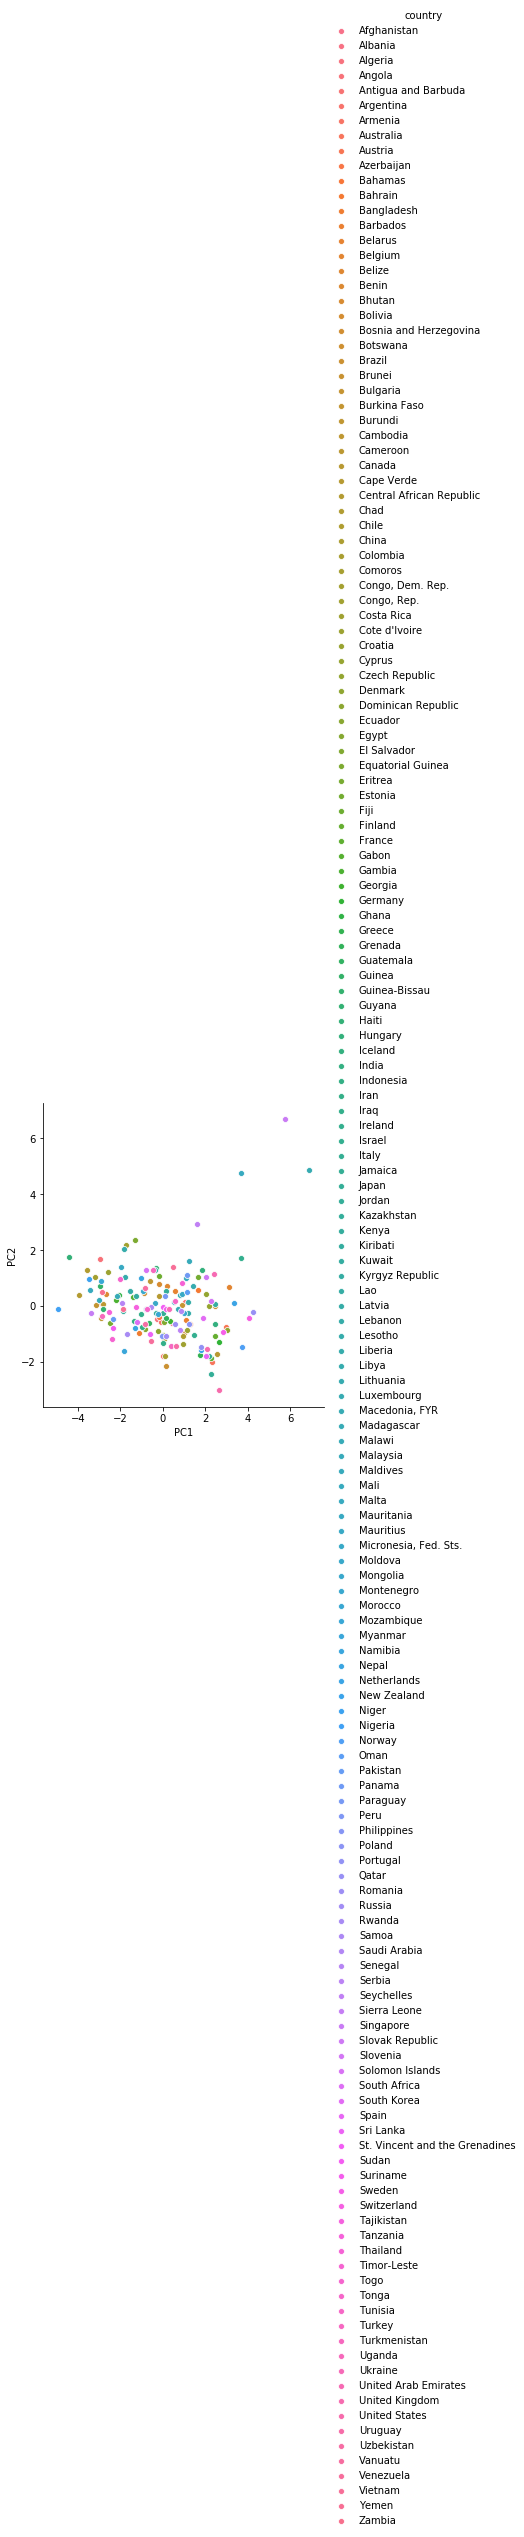

In [227]:
#Pairplot of pca components
import seaborn as sns
sns.pairplot(data=pca_df_final, x_vars=["PC1"], y_vars=["PC2"],hue = "country", size=5)

In [176]:
#Adding ID to the given principal components
pca_df1 = pd.DataFrame({'ID': list(ID), 'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2]})

In [177]:
pca_df1 .head()

,ID,PC1,PC2,PC3
0,100,-2.917491,0.006782,1.149719
1,101,0.427164,-0.849421,-0.524328
2,102,-0.270015,-0.176265,-1.555131
3,103,-2.928291,2.207142,-0.427484
4,104,1.026479,-0.071315,-0.286053


In [178]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [195]:
#checking the hopkins measure
hopkins(pca_df1.drop('ID', axis=1))

0.8418441337150768

In [196]:
# Now for perfroming clustering, we need to again drop the ID column.
Clustering1 = pca_df1.drop('ID', axis = 1)

In [197]:
Clustering1.head()

,PC1,PC2,PC3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


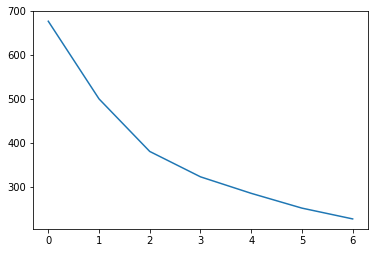

In [198]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Clustering1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [200]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Clustering1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Clustering1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.36624838761613165
For n_clusters=3, the silhouette score is 0.3354051845452397
For n_clusters=4, the silhouette score is 0.331138568287754
For n_clusters=5, the silhouette score is 0.3279303698261751
For n_clusters=6, the silhouette score is 0.30038681565044184
For n_clusters=7, the silhouette score is 0.26344927610071905
For n_clusters=8, the silhouette score is 0.2894000381197529


In [201]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(Clustering1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [202]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [203]:
# assign the label
pca_df1['cluster_id'] = kmeans.labels_
pca_df1.head()

,ID,PC1,PC2,PC3,cluster_id
0,100,-2.917491,0.006782,1.149719,2
1,101,0.427164,-0.849421,-0.524328,1
2,102,-0.270015,-0.176265,-1.555131,1
3,103,-2.928291,2.207142,-0.427484,2
4,104,1.026479,-0.071315,-0.286053,1


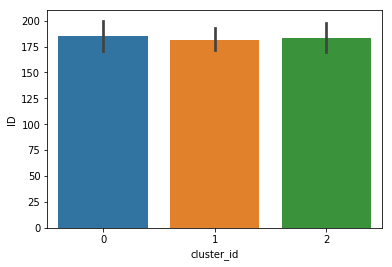

In [208]:
sns.barplot(x = 'cluster_id', y= 'ID',data = pca_df1)

In [210]:
Countrydata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [211]:
#Profiling the data
Countrydata['cluster_id'] = kmeans.labels_
Countrydata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,1


In [212]:
Countrydata.drop('ID', axis =1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,5.821429,60.371429,8.496905,54.666667,42119.047619,2.395286,79.364286,1.767143,38485.238095
1,23.203846,38.253705,6.028846,44.054691,11946.794872,8.418321,72.701282,2.354487,5992.076923
2,92.270213,28.634255,6.619149,44.646809,3453.468085,11.539043,59.123404,4.988085,1728.765957


In [221]:
Countrydata_df = pd.concat([Countrydata, y], axis=1)

In [222]:
Countrydata_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id,cluster_labels,country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,1,0,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1,0,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103,2,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,1,0,Antigua and Barbuda


In [216]:
#Hirearchical clustering analysis
Countrydata1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


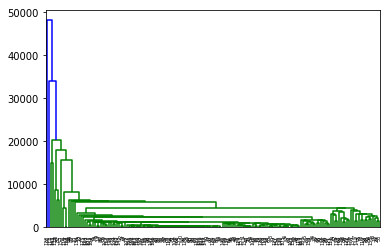

In [217]:
# single linkage
mergings = linkage(Countrydata1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

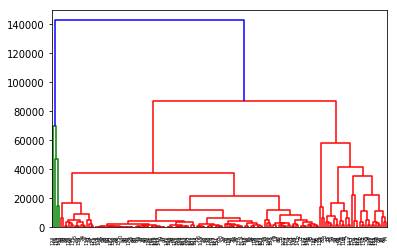

In [218]:
# complete linkage
mergings = linkage(Countrydata1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [219]:
# we take clusters as 3
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [220]:
Countrydata['cluster_labels'] = cluster_labels
Countrydata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103,2,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,1,0
